# Logistic Regression Batch ve SGD

In [39]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
data=pd.read_csv("BankNote_Authentication.csv")

In [40]:
data.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


## özellikleri al ve son sütunu çıkar

In [41]:
x = data.drop(columns='class').copy().values
y=data['class'].values

## normalize Et

In [42]:
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

In [43]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.2,random_state=42)

## sigmoid fonksiyonu

In [44]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

## Loss Fonksiyonu (Binary Cross-Entropy)

In [45]:
def compute_loss(y, y_pred):
    m = len(y)
    epsilon = 1e-15  # log(0) hatası için
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    return -1/m * np.sum(y*np.log(y_pred) + (1 - y)*np.log(1 - y_pred))

## Batch Gradient Descent

In [46]:
def logistic_regression_batch(X, y, lr=0.01, epochs=5000):
    m, n = X.shape
    weights = np.zeros(n)
    bias = 0
    losses = []

    for epoch in range(epochs):
        linear_model = np.dot(X, weights) + bias
        y_pred = sigmoid(linear_model)

        loss = compute_loss(y, y_pred)
        losses.append(loss)

        # Gradient hesapla
        dw = (1/m) * np.dot(X.T, (y_pred - y))
        db = (1/m) * np.sum(y_pred - y)

        # Güncelle
        weights -= lr * dw
        bias -= lr * db

    return weights, bias, losses

## Stochastic Gradient Descent

In [47]:
def logistic_regression_sgd(X, y, lr=0.01, epochs=5000):
    m, n = X.shape
    weights = np.zeros(n)
    bias = 0
    losses = []

    for epoch in range(epochs):
        i = np.random.randint(0, m)
        xi = X[i, :].reshape(1, -1)
        yi = y[i]

        linear_model = np.dot(xi, weights) + bias
        y_pred = sigmoid(linear_model)

        loss = compute_loss(np.array([yi]), y_pred)
        losses.append(loss)

        dw = np.dot(xi.T, (y_pred - yi))
        db = y_pred - yi

        weights -= lr * dw.flatten()
        bias -= lr * db

    return weights, bias, losses

##  Eğitim (Batch)

In [48]:
w_batch, b_batch, loss_batch = logistic_regression_batch(x_train, y_train, lr=0.01, epochs=5000)

## Eğitim (SGD)

In [49]:
w_sgd, b_sgd, loss_sgd = logistic_regression_sgd(x_train, y_train, lr=0.01, epochs=5000)

## Loss Karşılaştırma

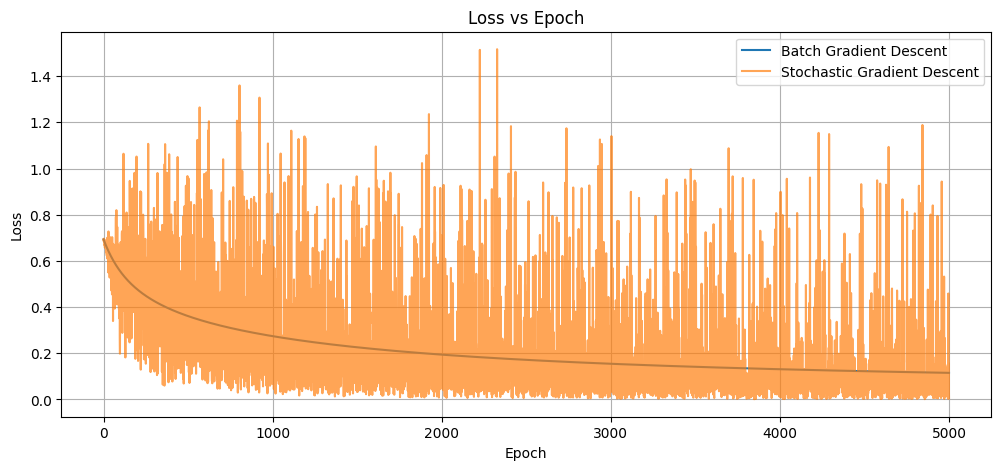

In [50]:
plt.figure(figsize=(12, 5))
plt.plot(loss_batch, label='Batch Gradient Descent')
plt.plot(loss_sgd, label='Stochastic Gradient Descent', alpha=0.7)
plt.title('Loss vs Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

## Tahmin Fonksiyonu

In [34]:
def predict(X, weights, bias):
    return sigmoid(np.dot(X, weights) + bias) >= 0.5


## Performans (Batch)

In [36]:
y_pred_batch = predict(x_test, w_batch, b_batch)
acc_batch = accuracy_score(y_test, y_pred_batch)
cm_batch = confusion_matrix(y_test, y_pred_batch)

## Performans (SGD)

In [37]:
y_pred_sgd = predict(x_test, w_sgd, b_sgd)
acc_sgd = accuracy_score(y_test, y_pred_sgd)
cm_sgd = confusion_matrix(y_test, y_pred_sgd)

## Batch Gradient Descent için karmaşıklık matrisi

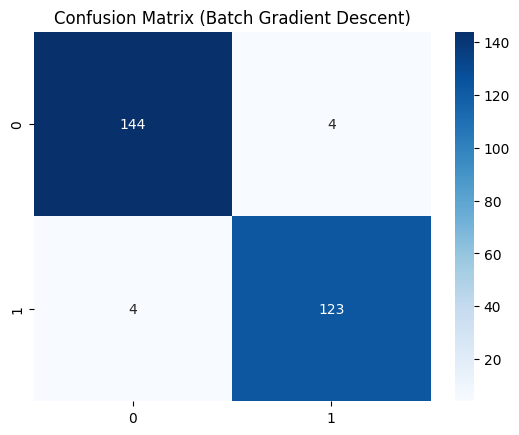

In [52]:

sns.heatmap(cm_batch, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix (Batch Gradient Descent)')
plt.show()

## Stochastic Gradient Descent için karmaşıklık matrisi


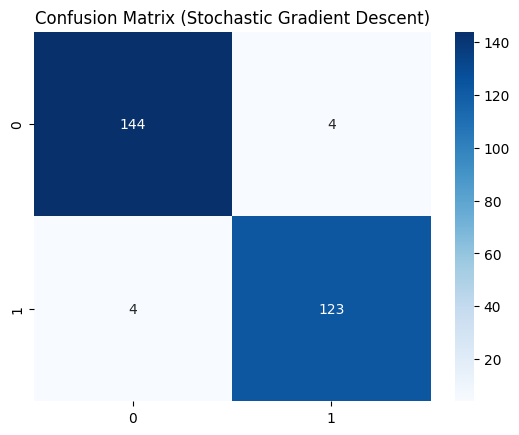

In [53]:
sns.heatmap(cm_sgd, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix (Stochastic Gradient Descent)')
plt.show()